# Satellite Image Data

Satellite image data refers to information captured by satellites orbiting the Earth, usually in the form of images or other types of remote sensing data. These satellites are equipped with sensors that can detect and record electromagnetic radiation across different wavelengths. The collected data provides valuable insights into various aspects of the Earth's surface and atmosphere.

# Use cases

Satellite image data is utilized in a wide range of fields and applications due to its ability to provide detailed information about the Earth's surface and atmosphere. Here are some prominent use cases:

* Environmental Monitoring:
	* Deforestation Analysis: Satellite imagery is used to monitor changes in forest cover, identify deforested areas, and assess the impact on ecosystems.
	* Habitat Monitoring: Observing and protecting natural habitats by tracking changes in vegetation, water bodies, and biodiversity.

* Agriculture:
	* Crop Health Assessment: Monitoring crops using satellite data helps detect diseases, assess overall health, and optimize irrigation and fertilizer application.
	* Yield Prediction: Predicting crop yields based on satellite observations assists in efficient resource management and supports food security.

* Urban Planning:
	* Land Use and Land Cover Mapping: Satellite imagery is employed to analyze urban expansion, changes in land use, and planning infrastructure development.
	* Population Density Mapping: Estimating population density in urban areas to support city planning and resource allocation.

* Disaster Management:
	* Natural Disaster Response: Rapid assessment of disaster-affected areas, including floods, earthquakes, and wildfires, to facilitate timely and effective response efforts.
	* Risk Assessment: Identifying vulnerable areas and assessing the potential impact of natural disasters before they occur.

* Weather Forecasting:
	* Cloud Cover Monitoring: Monitoring cloud patterns and cover to improve weather forecasting and climate modeling.
	* Atmospheric Conditions: Observing atmospheric conditions, temperature, and humidity to enhance short-term and long-term weather predictions.
* Infrastructure Monitoring:
	* Pipeline and Transportation Monitoring: Detecting changes and potential issues in infrastructure, such as oil and gas pipelines, railways, and roads.
	* Construction Monitoring: Tracking progress and changes in construction projects and infrastructure development.

* Natural Resource Management:
	* Water Resource Monitoring: Assessing changes in water bodies, tracking water quality, and managing water resources.
	* Mineral Exploration: Identifying and mapping geological features to support mineral exploration activities.
* Oceanography:
	* Ocean Monitoring: Studying ocean currents, temperature, and sea surface conditions for fisheries management and understanding climate patterns.
	* Coral Reef Monitoring: Assessing the health of coral reefs and detecting changes caused by climate change and human activities.

* Humanitarian Aid:
	* Refugee Camp Monitoring: Observing and managing refugee camps during crises to provide support and aid distribution.
	* Infrastructure Damage Assessment: Assessing damage to infrastructure in conflict zones or post-disaster scenarios.
* Scientific Research:
	* Climate Studies: Analyzing long-term satellite data to understand climate change, monitor ice caps, and study environmental trends.
	* Ecological Research: Studying ecosystems, wildlife habitats, and migration patterns for ecological research and conservation efforts.
  
These use cases demonstrate the versatility and importance of satellite image data in addressing various societal, environmental, and economic challenges.

## Resources
https://github.com/satellite-image-deep-learning/techniques

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Standardization

In [ ]:
import zipfile

In [ ]:
# prompt: code for unzipping data

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Data Live projects/Satelight data/data-20240406T072256Z-001.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:

import pandas as pd
import os

# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

# Define the labels/classes
labels = {'/content/data/cloudy' : 'Cloudy',
          '/content/data/desert' : 'Desert',
          '/content/data/green_area' : 'Green_Area',
          '/content/data/water' : 'Water',
           }

In [ ]:
# Loop over the train, test, and val folders and extract the image path and label
for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        row = pd.Series({'image_path': image_path, 'label': label})
        data = pd.concat([data, pd.DataFrame([row], columns=row.index)]).reset_index(drop=True)

In [ ]:
# Save the data to a CSV file
data.to_csv('image_dataset.csv', index=False)

### Importing Libraries & Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Load the dataset
df = pd.read_csv("image_dataset.csv")
df.head()

,image_path,label
0,/content/drive/MyDrive/GFG/27. Working with Sa...,Cloudy
1,/content/drive/MyDrive/GFG/27. Working with Sa...,Cloudy
2,/content/drive/MyDrive/GFG/27. Working with Sa...,Cloudy
3,/content/drive/MyDrive/GFG/27. Working with Sa...,Cloudy
4,/content/drive/MyDrive/GFG/27. Working with Sa...,Cloudy


### Data Splits & Augmentation

In [ ]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more infor

In [ ]:
# Pre-process the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")

Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


### Building a Basic Deep Learning Model (CNN)

relu = rectified linear unit = max(0, x)

In [ ]:
# Build a deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training

In [ ]:
history = model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5
141/141 [==============================] - 1290s 9s/step - loss: 0.6649 - accuracy: 0.6639 - val_loss: 0.6217 - val_accuracy: 0.7418
Epoch 2/5
141/141 [==============================] - 83s 587ms/step - loss: 0.5735 - accuracy: 0.6843 - val_loss: 0.4961 - val_accuracy: 0.6930
Epoch 3/5
141/141 [==============================] - 85s 603ms/step - loss: 0.5275 - accuracy: 0.7325 - val_loss: 0.4619 - val_accuracy: 0.8323
Epoch 4/5
141/141 [==============================] - 85s 603ms/step - loss: 0.5370 - accuracy: 0.7500 - val_loss: 0.5374 - val_accuracy: 0.7782
Epoch 5/5
141/141 [==============================] - 83s 589ms/step - loss: 0.4278 - accuracy: 0.8197 - val_loss: 0.4429 - val_accuracy: 0.8217


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 251, 251, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 125, 125, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 123, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 59, 59, 128)       7

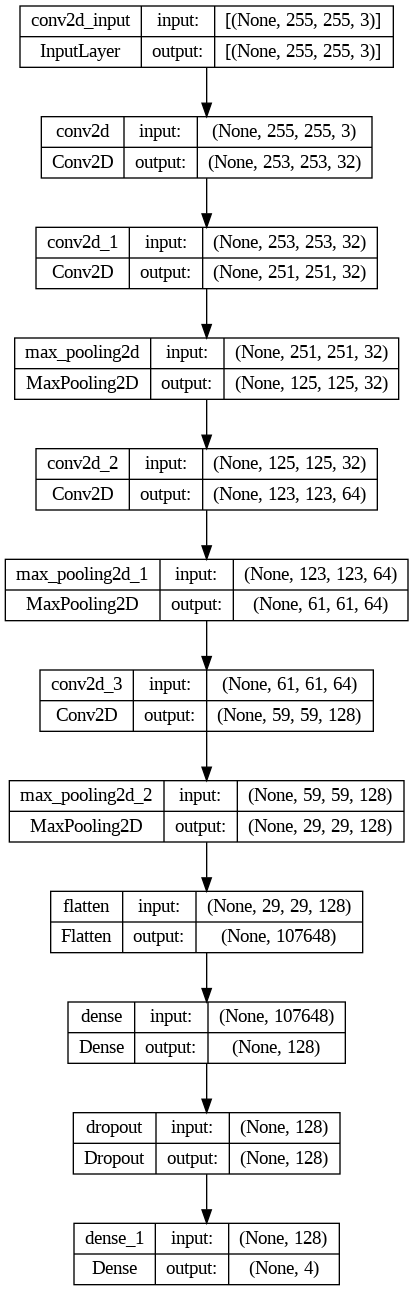

In [ ]:
from tensorflow.keras.utils import plot_model
from PIL import Image

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

### Model Evaluation

In [ ]:
num_samples = test_df.shape[0]
num_samples

1127

In [ ]:
score = model.evaluate(test_generator,
                       steps=num_samples//32+1,
                       )

36/36 [==============================] - 4s 104ms/step - loss: 0.4429 - accuracy: 0.8217


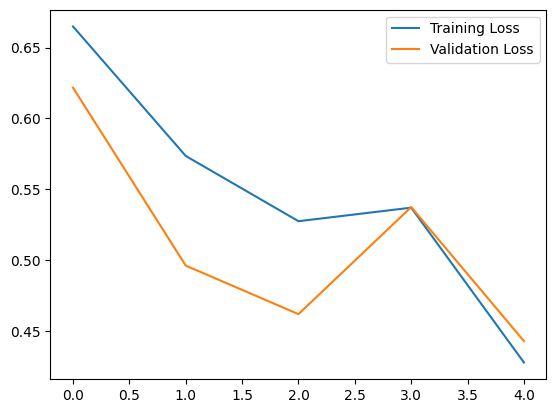

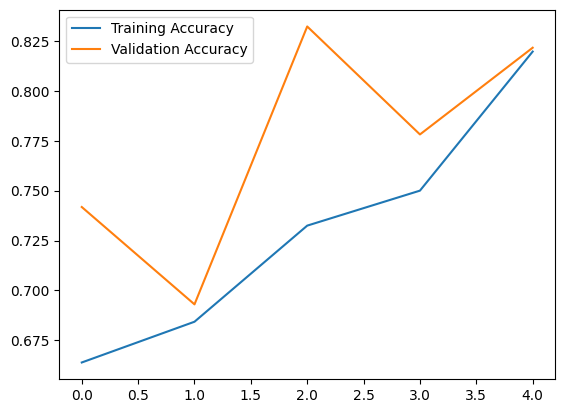

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Model Prediction

In [ ]:
# Load the model
model = load_model("Model.h5")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

In [ ]:
# Load an image from the test set
img = load_img("/content/drive/MyDrive/GFG/27. Working with Satellite Image Data - 6th January, 2024/data/green_area/Forest_1768.jpg", target_size=(255, 255))

In [ ]:
# Convert the image to an array
img_array = img_to_array(img)
img_array

array([[[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       ...,

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]]

In [ ]:
img_array.shape

(255, 255, 3)

In [ ]:
# Normalize the image pixel values to the range [0, 1]
img_array = img_array / 255.0
img_array

array([[[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       ...,

       [[0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0

In [ ]:
import numpy as np
img_array = np.reshape(img_array, (1, 255, 255, 3))

In [ ]:
# Get the model predictions
predictions = model.predict(img_array)

1/1 [==============================] - 0s 449ms/step


In [ ]:
# Get the class index with the highest predicted probability
class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_names[class_index]

print("The image is predicted to be '{}'.".format(predicted_label))

The image is predicted to be 'Green_Area'.


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
predictions = model.predict(test_generator)

36/36 [==============================] - 3s 87ms/step


In [ ]:
actual_labels = test_generator.classes

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([0, 0, 3, ..., 0, 3, 2])

### Confusion Matrix

In [ ]:
cm = confusion_matrix(actual_labels, predicted_labels)

In [ ]:
print(cm)

[[110  53  66  99]
 [ 65  40  40  82]
 [ 76  45  66  97]
 [ 93  49  46 100]]


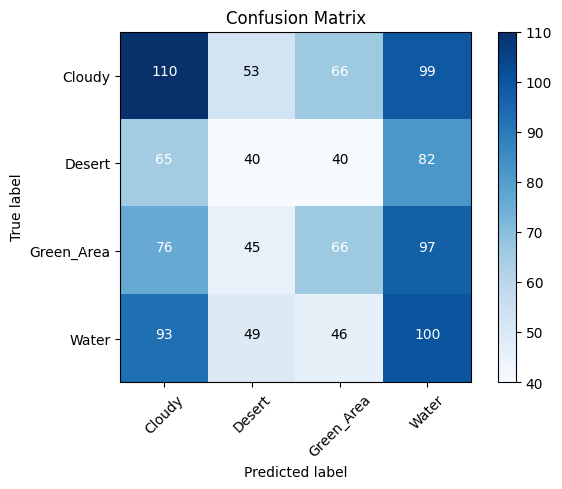

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Confusion matrix


# Plot the confusion matrix as an image
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add the class labels to the plot
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add values to the plot
threshold = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()